In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('TKS.csv')
df.iloc[:5]
df.drop(columns = ['(Saleable).1','Trans.','Date','Change','Last','Transaction','Date.1'], inplace=True)

In [3]:
column_names = ['Mansion','floor','flat','Area (Saleable)','Area (Gross)','Price(m)','Price/ft^2(Saleable)','Price/ft^2(Gross)','Trans.Date','Change','Last Transaction Date']
df.columns = column_names
df.head()

,Mansion,floor,flat,Area (Saleable),Area (Gross),Price(m),Price/ft^2(Saleable),Price/ft^2(Gross),Trans.Date,Change,Last Transaction Date
0,Horizon Gardens\nFu Tien Mansion,26,A,787,-,1165,"14,806",-,2016-08-25,+86.4%,1996-11-26
1,Horizon Gardens\nFu Tien Mansion,26,A,787,-,625,"7,943",-,1996-11-26,NaN,NaN
2,Horizon Gardens\nFu Tien Mansion,26,B,624,-,22,352,-,2016-11-28,-96.6%,2011-08-22
3,Horizon Gardens\nFu Tien Mansion,26,B,624,-,647,"10,360",-,2011-08-22,+7.8%,1997-04-14
4,Horizon Gardens\nFu Tien Mansion,26,B,624,-,600,"9,611",-,1997-04-14,+25.0%,1996-11-26


In [4]:
df.shape

(17572, 11)

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(17565, 11)

In [7]:
#pd.set_option( 'display.max_rows', 17565)

In [8]:
filt = df['Trans.Date'] != 'Price/ft2'
df = df[filt]
df

,Mansion,floor,flat,Area (Saleable),Area (Gross),Price(m),Price/ft^2(Saleable),Price/ft^2(Gross),Trans.Date,Change,Last Transaction Date
0,Horizon Gardens\nFu Tien Mansion,26,A,787,-,1165,"14,806",-,2016-08-25,+86.4%,1996-11-26
1,Horizon Gardens\nFu Tien Mansion,26,A,787,-,625,"7,943",-,1996-11-26,NaN,NaN
2,Horizon Gardens\nFu Tien Mansion,26,B,624,-,22,352,-,2016-11-28,-96.6%,2011-08-22
3,Horizon Gardens\nFu Tien Mansion,26,B,624,-,647,"10,360",-,2011-08-22,+7.8%,1997-04-14
4,Horizon Gardens\nFu Tien Mansion,26,B,624,-,600,"9,611",-,1997-04-14,+25.0%,1996-11-26
...,...,...,...,...,...,...,...,...,...,...,...
17567,Harbour View Gardens (East)\nWisteria Mansion,3,E,922,"1,029",1257,"13,624","12,214",2015-08-14,+128.6%,2009-03-09
17568,Harbour View Gardens (East)\nWisteria Mansion,3,E,922,"1,029",550,"5,962","5,345",2009-03-09,-27.6%,1997-06-12
17569,Harbour View Gardens (East)\nWisteria Mansion,3,E,922,"1,029",760,"8,239","7,386",1997-06-12,NaN,NaN
17570,Harbour View Gardens (East)\nWisteria Mansion,3,H,"1,114","1,237",530,"4,757","4,285",1999-01-22,+12.8%,1998-11-24


In [9]:
df[df['Trans.Date'] == '9,177']


,Mansion,floor,flat,Area (Saleable),Area (Gross),Price(m),Price/ft^2(Saleable),Price/ft^2(Gross),Trans.Date,Change,Last Transaction Date
9153,Kwun Hoi Terrace\nPak Hoi Mansion,13,D,*,708,825,650,*,"9,177",1997-11-26,00:00:00.0


In [10]:
df = df.drop([9153])

In [11]:
df[df['Trans.Date'] == '9,177']

,Mansion,floor,flat,Area (Saleable),Area (Gross),Price(m),Price/ft^2(Saleable),Price/ft^2(Gross),Trans.Date,Change,Last Transaction Date


In [12]:
df['Trans.Date'] = pd.to_datetime(df['Trans.Date'])

In [13]:
 df = df.sort_values('Trans.Date')

In [14]:
df['Price/ft^2(Saleable)'] = df['Price/ft^2(Saleable)'].str.replace(',','')
df['Price/ft^2(Gross)'] = df['Price/ft^2(Gross)'].str.replace(',','')

In [15]:
import numpy as np
df['Area (Gross)'] = df['Area (Gross)'].replace('-',np.nan)

In [16]:
df.shape

(17504, 11)

In [17]:
df['Area (Saleable)'] = df['Area (Saleable)'].str.replace(',','')
df['Area (Saleable)'] = pd.to_numeric(df['Area (Saleable)'], downcast = 'integer')

In [18]:
df.columns

Index(['Mansion', 'floor', 'flat', 'Area (Saleable)', 'Area (Gross)',
       'Price(m)', 'Price/ft^2(Saleable)', 'Price/ft^2(Gross)', 'Trans.Date',
       'Change', 'Last Transaction Date'],
      dtype='object')

In [19]:
df['Price(m)'] = pd.to_numeric(df['Price(m)'], downcast = 'integer')

In [20]:
df['Price/ft^2(Saleable)'] = pd.to_numeric(df['Price/ft^2(Saleable)'], downcast = 'integer')

In [21]:
df['Price/ft^2(Gross)'] = df['Price/ft^2(Gross)'].replace('-')
df['Price/ft^2(Gross)'] = df['Price/ft^2(Gross)'].replace('*')
df['Price/ft^2(Gross)'] = pd.to_numeric(df['Price/ft^2(Gross)'], downcast = 'integer')

In [22]:
df['Area (Gross)'] = df['Area (Gross)'].str.replace('-','')
df['Area (Gross)'] = df['Area (Gross)'].str.replace('*','')
df['Area (Gross)'] = df['Area (Gross)'].str.replace(',','')
df['Area (Gross)'] = pd.to_numeric(df['Area (Gross)'], downcast = 'integer')

<ipython-input-22-c364b087d447>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Area (Gross)'] = df['Area (Gross)'].str.replace('*','')


In [23]:
df.dtypes

Mansion                          object
floor                            object
flat                             object
Area (Saleable)                   int16
Area (Gross)                    float64
Price(m)                          int16
Price/ft^2(Saleable)              int32
Price/ft^2(Gross)                 int32
Trans.Date               datetime64[ns]
Change                           object
Last Transaction Date            object
dtype: object

In [24]:
df.head()

,Mansion,floor,flat,Area (Saleable),Area (Gross),Price(m),Price/ft^2(Saleable),Price/ft^2(Gross),Trans.Date,Change,Last Transaction Date
16635,Harbour View Gardens (West)\nJuniper Mansion,14,C,897,983.0,450,5019,4578,1996-01-03,NaN,NaN
1158,Horizon Gardens\nYat Tien Mansion,19,B,563,667.0,355,6306,5322,1996-01-03,NaN,NaN
10046,On Shing Terrace\nPo On Mansion,13,D,602,700.0,295,4903,4214,1996-01-03,NaN,NaN
7366,Kao Shan Terrace\nHeng Shan Mansion,8,D,593,691.0,284,4785,4107,1996-01-03,NaN,NaN
16537,Harbour View Gardens (West)\nJuniper Mansion,26,C,897,983.0,465,5186,4730,1996-01-03,NaN,NaN


In [25]:
import os 
os.getcwd()

'C:\\Users\\rowan\\OneDrive\\Documents\\GroupProjects\\ftds5\\Group4HKProperty'

In [26]:
hibor = pd.read_csv('hibor.csv')

In [27]:
hibor.head()

,Table 123 : Hong Kong Dollar Interest Settlement Rates,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Hong Kong Dollar Interest Settlement Rate,Hong Kong Dollar Interest Settlement Rate,Hong Kong Dollar Interest Settlement Rate,Hong Kong Dollar Interest Settlement Rate,Hong Kong Dollar Interest Settlement Rate
2,NaN,NaN,Rate at end of period(percent per annum),Rate at end of period(percent per annum),Rate at end of period(percent per annum),Rate at end of period(percent per annum),Rate at end of period(percent per annum)
3,Period,NaN,Overnight,1 week,1 month,3 months,6 months
4,Year,Quarter,NaN,NaN,NaN,NaN,NaN


In [28]:
to_drop = ['Unnamed: 2','Unnamed: 3','Unnamed: 5','Unnamed: 6']
hibor = hibor.drop(columns = to_drop)

In [29]:
hibor.drop(hibor.index[0:4], inplace = True)

In [30]:
pd.set_option('display.max_rows',140)
hibor

,Table 123 : Hong Kong Dollar Interest Settlement Rates,Unnamed: 1,Unnamed: 4
4,Year,Quarter,NaN
5,1996,NaN,5.48
6,1997,NaN,7.27
7,1998,NaN,5.38
8,1999,NaN,5.63
9,2000,NaN,6.31
10,2001,NaN,2.10
11,2002,NaN,1.49
12,2003,NaN,0.09
13,2004,NaN,0.28


In [31]:
hibor.drop(hibor.index[130:143], inplace = True)

In [32]:
hibor

,Table 123 : Hong Kong Dollar Interest Settlement Rates,Unnamed: 1,Unnamed: 4
4,Year,Quarter,NaN
5,1996,NaN,5.48
6,1997,NaN,7.27
7,1998,NaN,5.38
8,1999,NaN,5.63
9,2000,NaN,6.31
10,2001,NaN,2.10
11,2002,NaN,1.49
12,2003,NaN,0.09
13,2004,NaN,0.28


In [33]:
hibor.drop(hibor.index[130:133], inplace = True)

In [34]:
hibor

,Table 123 : Hong Kong Dollar Interest Settlement Rates,Unnamed: 1,Unnamed: 4
4,Year,Quarter,NaN
5,1996,NaN,5.48
6,1997,NaN,7.27
7,1998,NaN,5.38
8,1999,NaN,5.63
9,2000,NaN,6.31
10,2001,NaN,2.10
11,2002,NaN,1.49
12,2003,NaN,0.09
13,2004,NaN,0.28


In [35]:
hibor.drop([130,131,132,133], axis=0, inplace = True)

In [36]:
hibor

,Table 123 : Hong Kong Dollar Interest Settlement Rates,Unnamed: 1,Unnamed: 4
4,Year,Quarter,NaN
5,1996,NaN,5.48
6,1997,NaN,7.27
7,1998,NaN,5.38
8,1999,NaN,5.63
9,2000,NaN,6.31
10,2001,NaN,2.10
11,2002,NaN,1.49
12,2003,NaN,0.09
13,2004,NaN,0.28


In [37]:
new_columns = ['Year','Quarter','1month-HIBOR']
hibor.columns = new_columns

In [38]:
hibor.drop([4], axis=0, inplace = True)

In [39]:
hibor.drop(hibor.index[:25], inplace = True)

In [40]:
hibor['Year'] = hibor['Year'].astype('int')
hibor['1month-HIBOR'] = hibor['1month-HIBOR'].astype('float')

In [41]:
hibor.dtypes

Year              int32
Quarter          object
1month-HIBOR    float64
dtype: object

In [91]:
df.head()

,Mansion,floor,flat,Area (Saleable),Area (Gross),Price(m),Price/ft^2(Saleable),Price/ft^2(Gross),Trans.Date,Change,Last Transaction Date
16635,Harbour View Gardens (West)\nJuniper Mansion,14,C,897,983.0,450,5019,4578,1996-01-03,NaN,NaN
1158,Horizon Gardens\nYat Tien Mansion,19,B,563,667.0,355,6306,5322,1996-01-03,NaN,NaN
10046,On Shing Terrace\nPo On Mansion,13,D,602,700.0,295,4903,4214,1996-01-03,NaN,NaN
7366,Kao Shan Terrace\nHeng Shan Mansion,8,D,593,691.0,284,4785,4107,1996-01-03,NaN,NaN
16537,Harbour View Gardens (West)\nJuniper Mansion,26,C,897,983.0,465,5186,4730,1996-01-03,NaN,NaN


In [87]:
df['Trans.Date'] = pd.to_datetime(df['Trans.Date'])
df1 = df.resample('M', on='Trans.Date').mean()['Price/ft^2(Saleable)']
df2 = df.resample('Q', on='Trans.Date').mean()['Price/ft^2(Saleable)']
df2.head()

Trans.Date
1996-03-31    5394.008929
1996-06-30    6399.031008
1996-09-30    6377.417790
1996-12-31    6977.247041
1997-03-31    7990.918182
Freq: Q-DEC, Name: Price/ft^2(Saleable), dtype: float64

In [88]:
hibor.head()

,Year,Quarter,1month-HIBOR,Trans.Date
30,1996,Q3,5.46,1996-09-30
31,1996,Q4,5.48,1996-12-31
32,1997,Q1,5.84,1997-03-31
33,1997,Q2,6.10,1997-06-30
34,1997,Q3,7.49,1997-09-30


In [44]:
df2.drop(df2.index[:2],inplace=True)

In [45]:
df2.drop(df2.index[-1],inplace=True)

In [46]:
len(df2.index)

100

In [47]:
len(df2)

100

In [48]:
hibor['Trans.Date'] = df2.index

In [49]:
hibor

,Year,Quarter,1month-HIBOR,Trans.Date
30,1996,Q3,5.46,1996-09-30
31,1996,Q4,5.48,1996-12-31
32,1997,Q1,5.84,1997-03-31
33,1997,Q2,6.10,1997-06-30
34,1997,Q3,7.49,1997-09-30
35,1997,Q4,7.27,1997-12-31
36,1998,Q1,5.54,1998-03-31
37,1998,Q2,9.88,1998-06-30
38,1998,Q3,7.11,1998-09-30
39,1998,Q4,5.38,1998-12-31


In [50]:
hibor3 = hibor.set_index('Trans.Date')

In [51]:
hibor3['Price/ft^2(Saleable)'] = df2

In [52]:
hibor3.columns


Index(['Year', 'Quarter', '1month-HIBOR', 'Price/ft^2(Saleable)'], dtype='object')

Text(0.5, 1.0, 'Linear regression between HIBOR/interest rates vs. housing price/sqft')

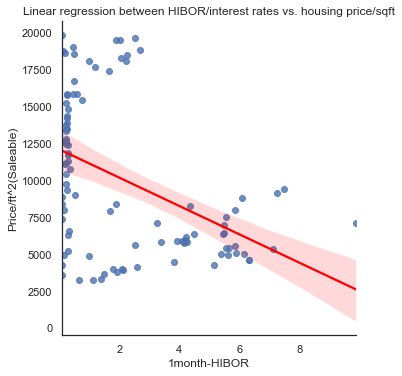

In [115]:
import seaborn as sns
sns.lmplot(x='1month-HIBOR',y='Price/ft^2(Saleable)',data=hibor3,fit_reg=True, line_kws={'color': 'red'})
ax = plt.gca()
ax.set_title('Linear regression between HIBOR/interest rates vs. housing price/sqft')

In [59]:
cor_data = hibor3[['1month-HIBOR','Price/ft^2(Saleable)']]
corr = cor_data.corr(method='pearson')
corr

,1month-HIBOR,Price/ft^2(Saleable)
1month-HIBOR,1.000000,-0.441876
Price/ft^2(Saleable),-0.441876,1.000000


In [108]:
df.tail()

,Mansion,floor,flat,Area (Saleable),Area (Gross),Price(m),Price/ft^2(Saleable),Price/ft^2(Gross),Trans.Date,Change,Last Transaction Date
17046,Harbour View Gardens (East)\nPrimrose Mansion,25,B,1015,1137.0,2478,24413,21794,2021-08-16,+79.6%,2012-02-09
7173,Kao Shan Terrace\nYee Shan Mansion,6,H,593,691.0,1000,16861,14472,2021-08-16,+164.6%,2010-01-28
9376,Kwun Hoi Terrace\nTung Hoi Mansion,17,C,723,835.0,1450,20046,17365,2021-08-17,+427.3%,2003-03-17
5167,Kao Shan Terrace\nFu Shan Mansion,1,H,690,788.0,1075,15580,13642,2021-08-18,+13.2%,2017-06-27
16556,Harbour View Gardens (West)\nJuniper Mansion,23,C,897,983.0,1728,19272,17579,2021-08-18,+35.0%,2018-01-12


Text(0.5, 1.0, 'Correlation between Jan 1996 to Aug 2021')

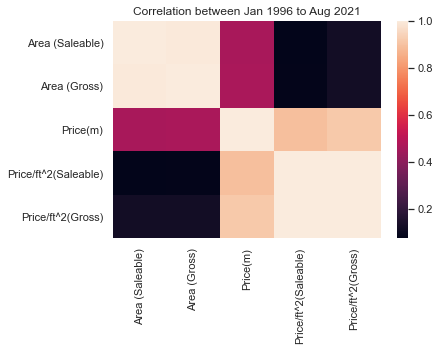

In [110]:
df5 = df[['Area (Saleable)','Area (Gross)','Price(m)','Price/ft^2(Saleable)','Price/ft^2(Gross)']]
corr = df5.corr(method="pearson")
ax = plt.axes()
sns.heatmap(corr, ax = ax)
ax.set_title('Correlation between Jan 1996 to Aug 2021')